In [3]:
pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/66/82/564168a349148298aca281e342551404ef5521f33fba17b388ead0a84dc5/opencv_python-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl.metadata
  Using cached opencv_python-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl (54.8 MB)
Note: you may need to restart the kernel to use updated packages.


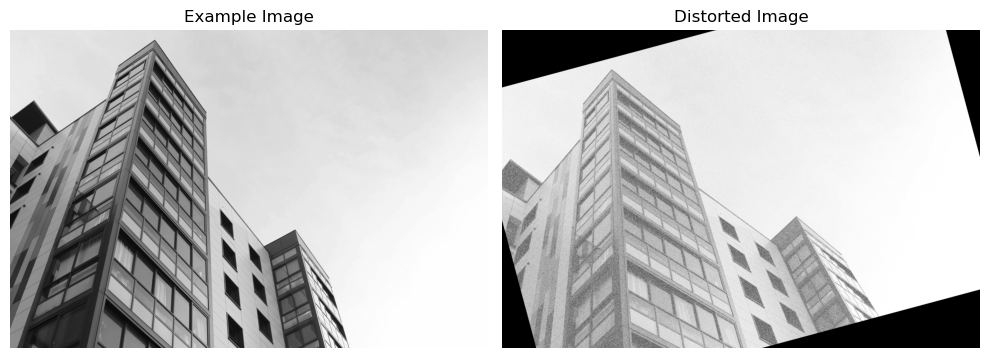

True

In [75]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
input_image_path = "images/built.jpg"  # Replace with your image path
example_img = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded
if example_img is None:
    raise FileNotFoundError(f"Image not found at {input_image_path}")

# Create a distorted version
# 1. Add Gaussian noise
noise = np.random.normal(0, 5, example_img.shape).astype(np.uint8)
distorted_img = cv2.add(example_img, noise)

# 2. Apply rotation
(h, w) = distorted_img.shape
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle=15, scale=1.0)
distorted_img = cv2.warpAffine(distorted_img, rotation_matrix, (w, h))

# Plot both images
plt.figure(figsize=(10, 5))

# Display the example image
plt.subplot(1, 2, 1)
plt.title("Example Image")
plt.imshow(example_img, cmap='gray')
plt.axis('off')

# Display the distorted image
plt.subplot(1, 2, 2)
plt.title("Distorted Image")
plt.imshow(distorted_img, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()



cv2.imwrite("images/distorted_image.jpg", distorted_img)  # Save the distorted image


In [76]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [80]:
im1 = cv2.imread('images/distorted_image.jpg')          # Image that needs to be registered.
im2 = cv2.imread('images/built.jpg') # trainImage

img1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

# Initiate ORB detector
orb = cv2.ORB_create(50)  #Registration works with at least 50 points

# find the keypoints and descriptors with orb
kp1, des1 = orb.detectAndCompute(img1, None)  #kp1 --> list of keypoints
kp2, des2 = orb.detectAndCompute(img2, None)

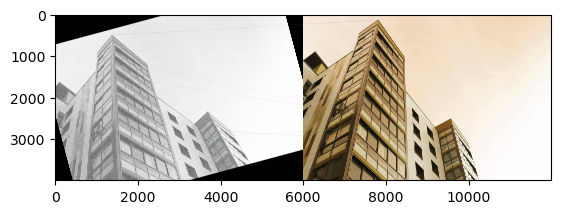

In [81]:
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)

# Match descriptors.
matches = matcher.match(des1, des2, None)  #Creates a list of all matches, just like keypoints

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv2.drawMatches(im1,kp1, im2, kp2, matches[:10], None)

plt.imshow(img3)

In [82]:
#RANSAC is abbreviation of RANdom SAmple Consensus, 
#in summary it can be considered as outlier rejection method for keypoints.

#RANSAC needs all key points indexed, first set indexed to queryIdx
#Second set to #trainIdx. 

points1 = np.zeros((len(matches), 2), dtype=np.float32)  #Prints empty array of size equal to (matches, 2)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
   points1[i, :] = kp1[match.queryIdx].pt    #gives index of the descriptor in the list of query descriptors
   points2[i, :] = kp2[match.trainIdx].pt    #gives index of the descriptor in the list of train descriptors


In [83]:
# Find homography
  
h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)
 
  # Use homography
height, width, channels = im2.shape
im1Reg = cv2.warpPerspective(im1, h, (width, height))  #Applies a perspective transformation to an image.
   
print("Estimated homography : \n",  h)

Estimated homography : 
 [[-1.84390022e-01 -2.20937521e-01  1.32337648e+03]
 [-7.85253419e-02 -9.39189006e-02  5.63072088e+02]
 [-1.39341430e-04 -1.66932087e-04  1.00000000e+00]]


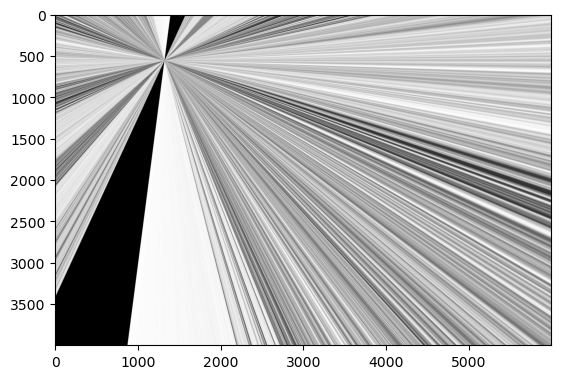

In [84]:
plt.imshow(im1Reg)